<a href="https://colab.research.google.com/github/trendinafrica/Comp_Neuro-ML_course/blob/main/notebooks/research_projects_notebooks/RNN_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN training tutorial with Pytorch

## TReND course in computational neuroscience and machine learning basics

Trains a recurrent neural network to integrate random noise and produce a cosine as an output.

<div>
<center><img src="https://github.com/trendinafrica/Comp_Neuro-ML_course/blob/main/notebooks/research_projects_notebooks/RNNpytorch.png/?raw=1" width=500></center>
</div>

Code written by Alex.Fulleda@autonoma.cat and adapted by ssaray@ucla.edu, jsoldadomagraner@cmu.edu, tom.george.20@ucl.ac.uk and k.aduut@gmail.com

In [107]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

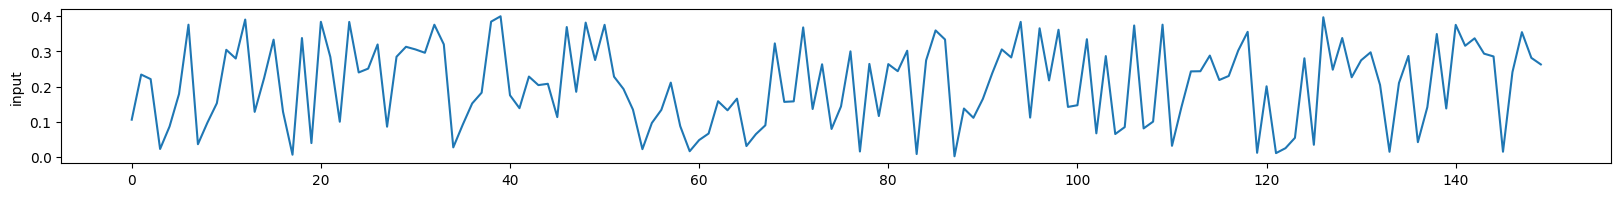

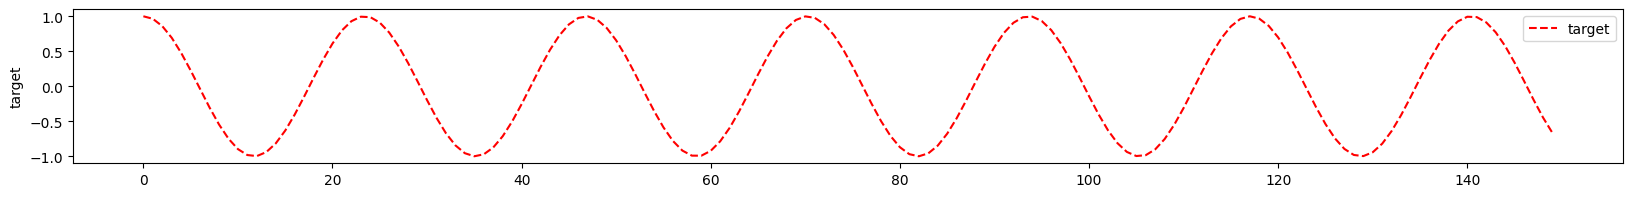

torch.Size([150, 1, 1])
torch.Size([150, 1, 1])


In [116]:
###########################
#Define Inputs and Targets
###########################

n_tsteps = 150

#input is just random noise
inputs = np.random.rand(n_tsteps) * 0.4
inputs_tensor = torch.from_numpy(inputs).float()
inputs_tensor = inputs_tensor[:,None,None]

#target is a cosine of frequency freq
freq = 20
x = np.linspace(0,freq,n_tsteps)
target = np.cos(2*x)
target_tensor = torch.from_numpy(target).float().reshape((-1,1,1))

#Plot the inputs and the target
plt.figure(1,figsize=(20, 2))
plt.plot(inputs)
plt.ylabel('input')


plt.figure(2,figsize=(20, 2))
plt.plot(target,'r--',label="target")
plt.ylabel('target')
plt.xlabel('time steps')

plt.legend()
plt.show()

print(inputs_tensor.size())
print(target_tensor.size())

In [117]:
###########################
#Define RNN Model
###########################

class RNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(RNNModel, self).__init__()

        # Number of hidden dimensions (= number of neurons of the recurrent pool)
        self.hidden_dim = hidden_dim

        # Number of hidden layers (if there is there are multiple RNNs)
        self.layer_dim = layer_dim

        # RNN
        self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, nonlinearity='relu') #uses the pytorch function for RNN.
        #Layer_dim is the "number of RNNs". Eg. setting layer_di=2 would mean stacking two RNNs together to form a stacked RNN, with the second RNN taking in outputs of the first RNN and computing the final results.
        #Input_dim is the size of the input layer

        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim) #Pytorch function. Implements a linear readout on the hidden units

    def forward(self, x):

        # One time step
        hidden, hn = self.rnn(x) #udates RNN
        out = self.fc(hidden[:, :]) #linear readout
        return out, hidden

## Train model

In [111]:
###########################
#Train model
###########################

n_epochs = 500
losses = []

model = RNNModel(1, 100, 1, 1) #input_dim, hidden_dim, layer_dim, output_dim

criterion = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001) #implements gradient descend

for epoch in range(n_epochs):

    yhat, hidden = model(inputs_tensor) #yhat is the output

    if epoch ==1 : #saving first epoch for comparison
      hidden1 = hidden
      yhat1 = yhat

    optimizer.zero_grad()
    loss = criterion(target_tensor, yhat) #computes the loss, difference between output yhat, and desired output (target)
    loss.backward() #backprop
    optimizer.step()
    losses.append(loss.item())

    if epoch % 100 == 0: #print the loss
      print('Step {}, Loss {:0.4f}'.format(
                epoch, loss))

output, hidden = model.forward(inputs_tensor) #last forward pass to check model performance


Step 0, Loss 0.4951
Step 100, Loss 0.4881
Step 200, Loss 0.0856
Step 300, Loss 0.0245
Step 400, Loss 0.0159


## Plotting

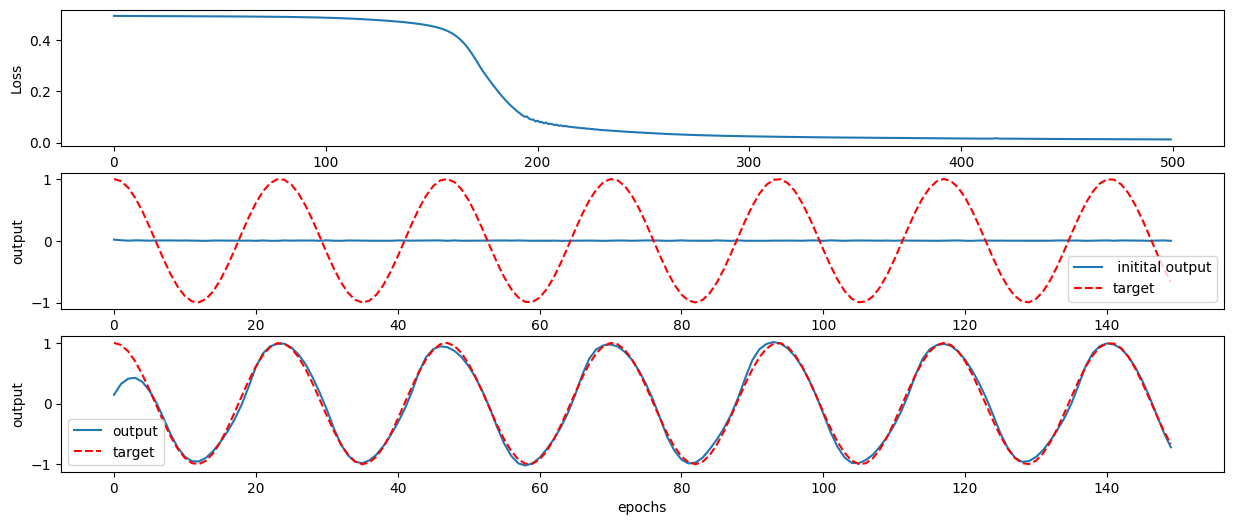

In [119]:
###########################
#Plotting
###########################

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 6))

ax1.plot(losses)
ax1.set_ylabel('Loss')
ax1.set_xlabel('epochs')

ax2.plot(yhat1.detach().numpy().reshape(-1),label=" initital output")
ax2.plot(target,'r--',label="target")
ax2.set_ylabel('output')
ax2.legend()

ax3.plot(output.detach().numpy().reshape(-1),label="output")
ax3.plot(target,'r--',label="target")
ax3.set_ylabel('output')
ax3.set_xlabel('time steps')

ax3.legend()

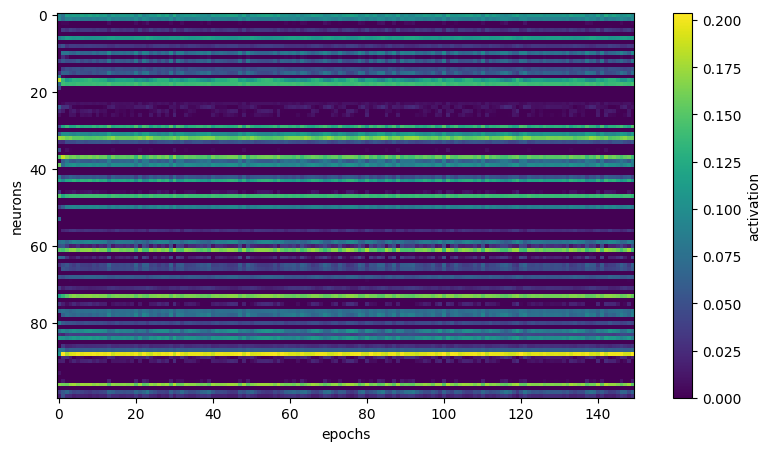

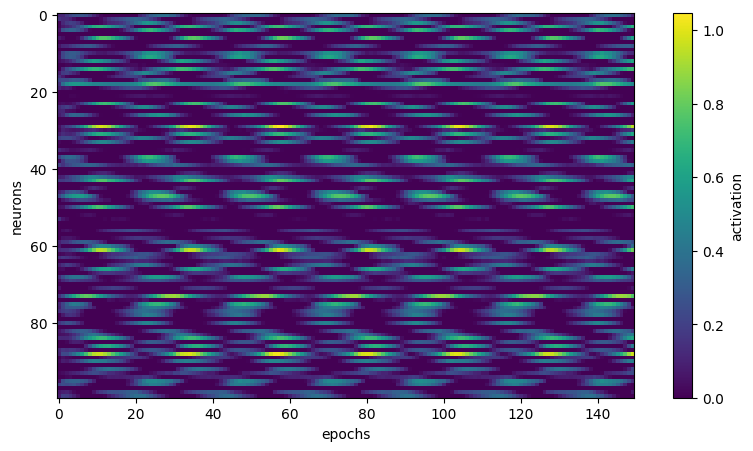

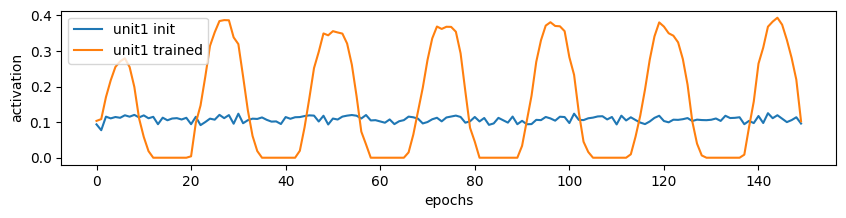

In [126]:
hiddennp1=hidden1.detach().numpy().squeeze(axis=1)
hiddennp=hidden.detach().numpy().squeeze(axis=1)

plt.figure(1,figsize=(10, 5))
plt.imshow(hiddennp1.T)
plt.xlabel('time steps')
plt.ylabel('neurons')
cbar = plt.colorbar()
cbar.set_label('activation')
plt.title('Hiddens init')

plt.figure(2,figsize=(10, 5))
plt.imshow(hiddennp.T)
plt.xlabel('time steps')
plt.ylabel('neurons')
cbar = plt.colorbar()
cbar.set_label('activation')
plt.title('Hiddens trained')


plt.figure(3,figsize=(10, 2))
plt.plot(hiddennp1[:,0],label="unit1 init")

plt.figure(3,figsize=(10, 2))
plt.plot(hiddennp[:,0],label="unit1 trained")
plt.xlabel('time steps')
plt.ylabel('activation')
plt.legend()

